In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pylab as pl
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn import utils
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import time

import warnings
warnings.filterwarnings('ignore')

SEED = 10
figsize=(15,10)

In [2]:
def heatMatrix(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Pred {label}' for label in labels]
    indices = [f'Real {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns = column, index = indices)
    
    return sns.heatmap(table, annot = True, fmt='d', cmap='PiYG')

def percentuais(a,b):
    x1 = (a-b)*100
    x2 = x1 /b
    return x1,x2

In [3]:
sensorDF = pd.read_csv(r'C:\Users\Filipe\Downloads\sensor.csv').dropna()
velocidadeDF = pd.read_csv(r'C:\Users\Filipe\Downloads\dataset_velocidade.csv').dropna()

In [4]:
sensorDF

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [5]:
sensorDF.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,...,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,1.471519,2.328159,2.490088,2.794286,2.956527,2.885590,3.349699,2.540066,3.123337,2.830110,...,2.214829,1.196320,0.987463,0.907868,1.060515,1.074699,1.016477,1.782219,1.554147,1.569449
std,0.804991,1.409665,1.247182,1.308188,1.340652,1.280586,1.414892,1.111894,1.354993,1.304911,...,1.719329,1.091822,0.936976,0.883791,1.148103,1.138271,0.887569,1.574439,1.292313,1.141331
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.124000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.918500,1.366000,1.536500,1.729000,1.772000,1.782000,1.928500,1.616500,1.800000,1.636500,...,0.861000,0.689000,0.580000,0.529000,0.524000,0.543000,0.568000,0.742000,0.790000,0.881000
50%,1.335000,1.910000,2.067000,2.455000,2.665000,2.676000,3.226000,2.168000,2.802000,2.681000,...,1.333000,0.802000,0.738000,0.684000,0.693000,0.693000,0.765000,1.034000,1.071000,1.287000
75%,1.814000,2.687500,2.744000,4.079500,4.315000,3.825500,5.000000,3.193000,5.000000,3.510000,...,4.793500,1.152000,0.913000,0.837000,0.857500,0.862500,1.006500,2.073500,1.558500,1.651000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
sensorDF.corr()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
sensor_1,1.000000,0.223013,0.139684,0.059098,0.019617,-0.109247,-0.282610,-0.191949,-0.303465,-0.276954,...,-0.133521,0.066169,0.139433,0.162044,0.181301,0.181332,0.283144,0.340938,0.380063,0.466897
sensor_2,0.223013,1.000000,0.318492,0.159644,0.145471,0.050829,-0.056205,-0.004061,-0.053489,-0.092031,...,-0.066576,-0.027068,-0.065642,-0.032842,0.027578,0.076013,0.055732,-0.001503,0.058847,0.100670
sensor_3,0.139684,0.318492,1.000000,0.398467,0.333634,0.158325,-0.074198,-0.183948,-0.223272,-0.179185,...,-0.134885,-0.010189,-0.065313,-0.102248,-0.066864,-0.007293,-0.008567,0.133827,0.113747,0.075982
sensor_4,0.059098,0.159644,0.398467,1.000000,0.626772,0.316612,-0.071653,-0.125458,-0.169005,-0.114588,...,-0.274145,0.022772,-0.118528,-0.180151,-0.191127,-0.096931,-0.075390,0.272626,0.161551,0.078394
sensor_5,0.019617,0.145471,0.333634,0.626772,1.000000,0.489278,0.072659,0.000040,-0.171219,-0.101353,...,-0.325783,-0.047534,-0.158425,-0.220191,-0.250198,-0.196026,-0.154442,0.115331,0.119019,0.087342
sensor_6,-0.109247,0.050829,0.158325,0.316612,0.489278,1.000000,0.378844,0.201425,0.113477,-0.020770,...,-0.190300,-0.145035,-0.210183,-0.248936,-0.251514,-0.226782,-0.215696,-0.101192,-0.096274,-0.083401
sensor_7,-0.282610,-0.056205,-0.074198,-0.071653,0.072659,0.378844,1.000000,0.410812,0.437748,0.261303,...,0.088608,-0.148099,-0.198933,-0.217389,-0.270799,-0.236595,-0.273535,-0.370798,-0.234281,-0.263318
sensor_8,-0.191949,-0.004061,-0.183948,-0.125458,0.000040,0.201425,0.410812,1.000000,0.534408,0.551087,...,-0.067113,-0.125044,-0.195587,-0.209111,-0.264880,-0.244279,-0.276891,-0.256965,-0.170638,-0.143895
sensor_9,-0.303465,-0.053489,-0.223272,-0.169005,-0.171219,0.113477,0.437748,0.534408,1.000000,0.563251,...,0.127339,-0.119004,-0.233979,-0.262122,-0.267828,-0.154146,-0.193894,-0.271040,-0.273458,-0.337259
sensor_10,-0.276954,-0.092031,-0.179185,-0.114588,-0.101353,-0.020770,0.261303,0.551087,0.563251,1.000000,...,0.046894,-0.035237,-0.203368,-0.238281,-0.295572,-0.223583,-0.218746,-0.178723,-0.208301,-0.262913


In [7]:
senVal = {}
for i in sensorDF.columns[:-1]:
    senVal[i] = {
        'maxValue' : max(sensorDF[i]),
        'minValue' : min(sensorDF[i]),
        'mean' : np.mean(sensorDF[i]),
        'interval 0-0.5' : len([j for j in sensorDF[i] if 0.5 >= j >= 0]),
        'interval 0.501-1' : len([j for j in sensorDF[i] if 1 >= j >= 0.501]),
        'inteval 1.001-1.5' : len([j for j in sensorDF[i] if 1.5 >= j >= 1.001]),
        'interval 1.501-2' : len([j for j in sensorDF[i] if 2 >= j >= 1.501]),
        'interval 2.001-2.5' : len([j for j in sensorDF[i] if 2.5 >= j >=2.001]),
        'interval 2.501-3' : len([j for j in sensorDF[i] if 3 >= j >= 2.501]),
        'interval 3.001-3.5' : len([j for j in sensorDF[i] if 3.5 >= j >= 3.001]),
        'interval 3.501-4' : len([j for j in sensorDF[i] if 4 >= j >= 3.501]),
        'interval 4.001-4.5' : len([j for j in sensorDF[i] if 4.5 >= j >= 4.001]),
        'interval 4.501+' : len([j for j in sensorDF[i] if j >= 4.501]),
        'quartiles' : np.quantile(sensorDF[i], [0.25,0.5,0.75])
        
    }    

In [8]:
for i in senVal.keys():
    print(i.replace('_',' ').capitalize())
    for j in senVal[i].keys():
        print(f'{j} = {senVal[i][j]}')
    print()

Sensor 1
maxValue = 5.0
minValue = 0.4
mean = 1.4715192570869984
interval 0-0.5 = 186
interval 0.501-1 = 1344
inteval 1.001-1.5 = 1808
interval 1.501-2 = 718
interval 2.001-2.5 = 675
interval 2.501-3 = 197
interval 3.001-3.5 = 4
interval 3.501-4 = 59
interval 4.001-4.5 = 38
interval 4.501+ = 86
quartiles = [0.9185 1.335  1.814 ]

Sensor 2
maxValue = 5.025
minValue = 0.437
mean = 2.3281589442815225
interval 0-0.5 = 87
interval 0.501-1 = 584
inteval 1.001-1.5 = 1262
interval 1.501-2 = 690
interval 2.001-2.5 = 893
interval 2.501-3 = 513
interval 3.001-3.5 = 23
interval 3.501-4 = 130
interval 4.001-4.5 = 24
interval 4.501+ = 909
quartiles = [1.366  1.91   2.6875]

Sensor 3
maxValue = 5.029
minValue = 0.47
mean = 2.4900879765395927
interval 0-0.5 = 5
interval 0.501-1 = 80
inteval 1.001-1.5 = 1083
interval 1.501-2 = 1195
interval 2.001-2.5 = 972
interval 2.501-3 = 670
interval 3.001-3.5 = 97
interval 3.501-4 = 128
interval 4.001-4.5 = 68
interval 4.501+ = 817
quartiles = [1.5365 2.067  2.744

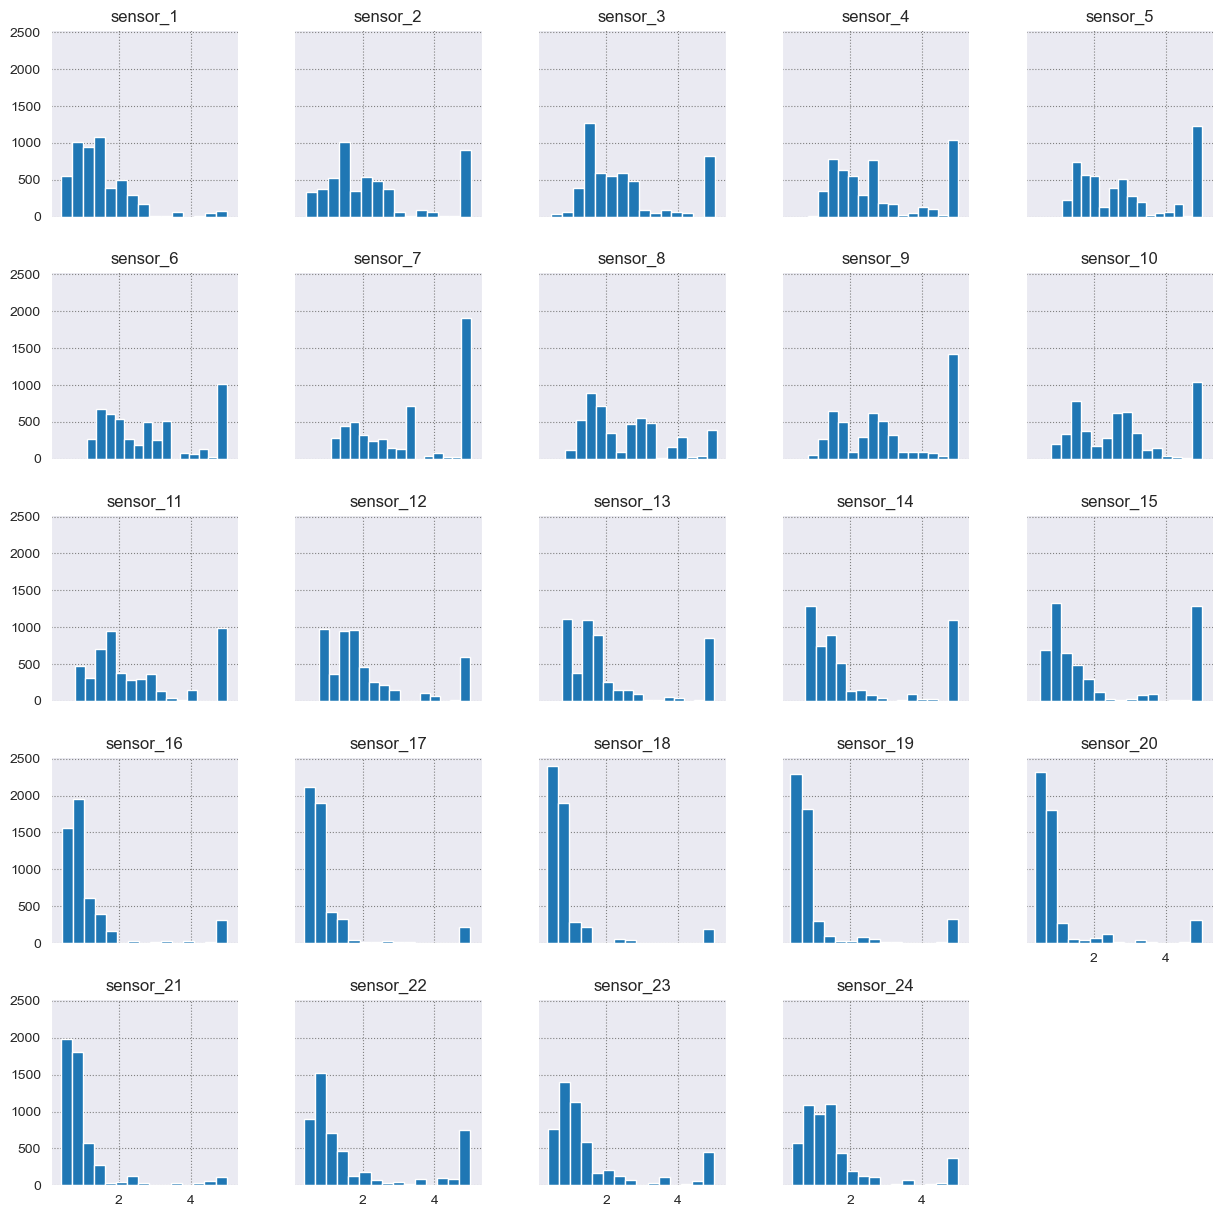

In [9]:
sns.set_style("darkgrid", {"grid.color": "0.5", "grid.linestyle": ":"})


sensorDF[:-1].hist(bins=15,figsize=(15,15), sharex=True, sharey=True)
plt.show()

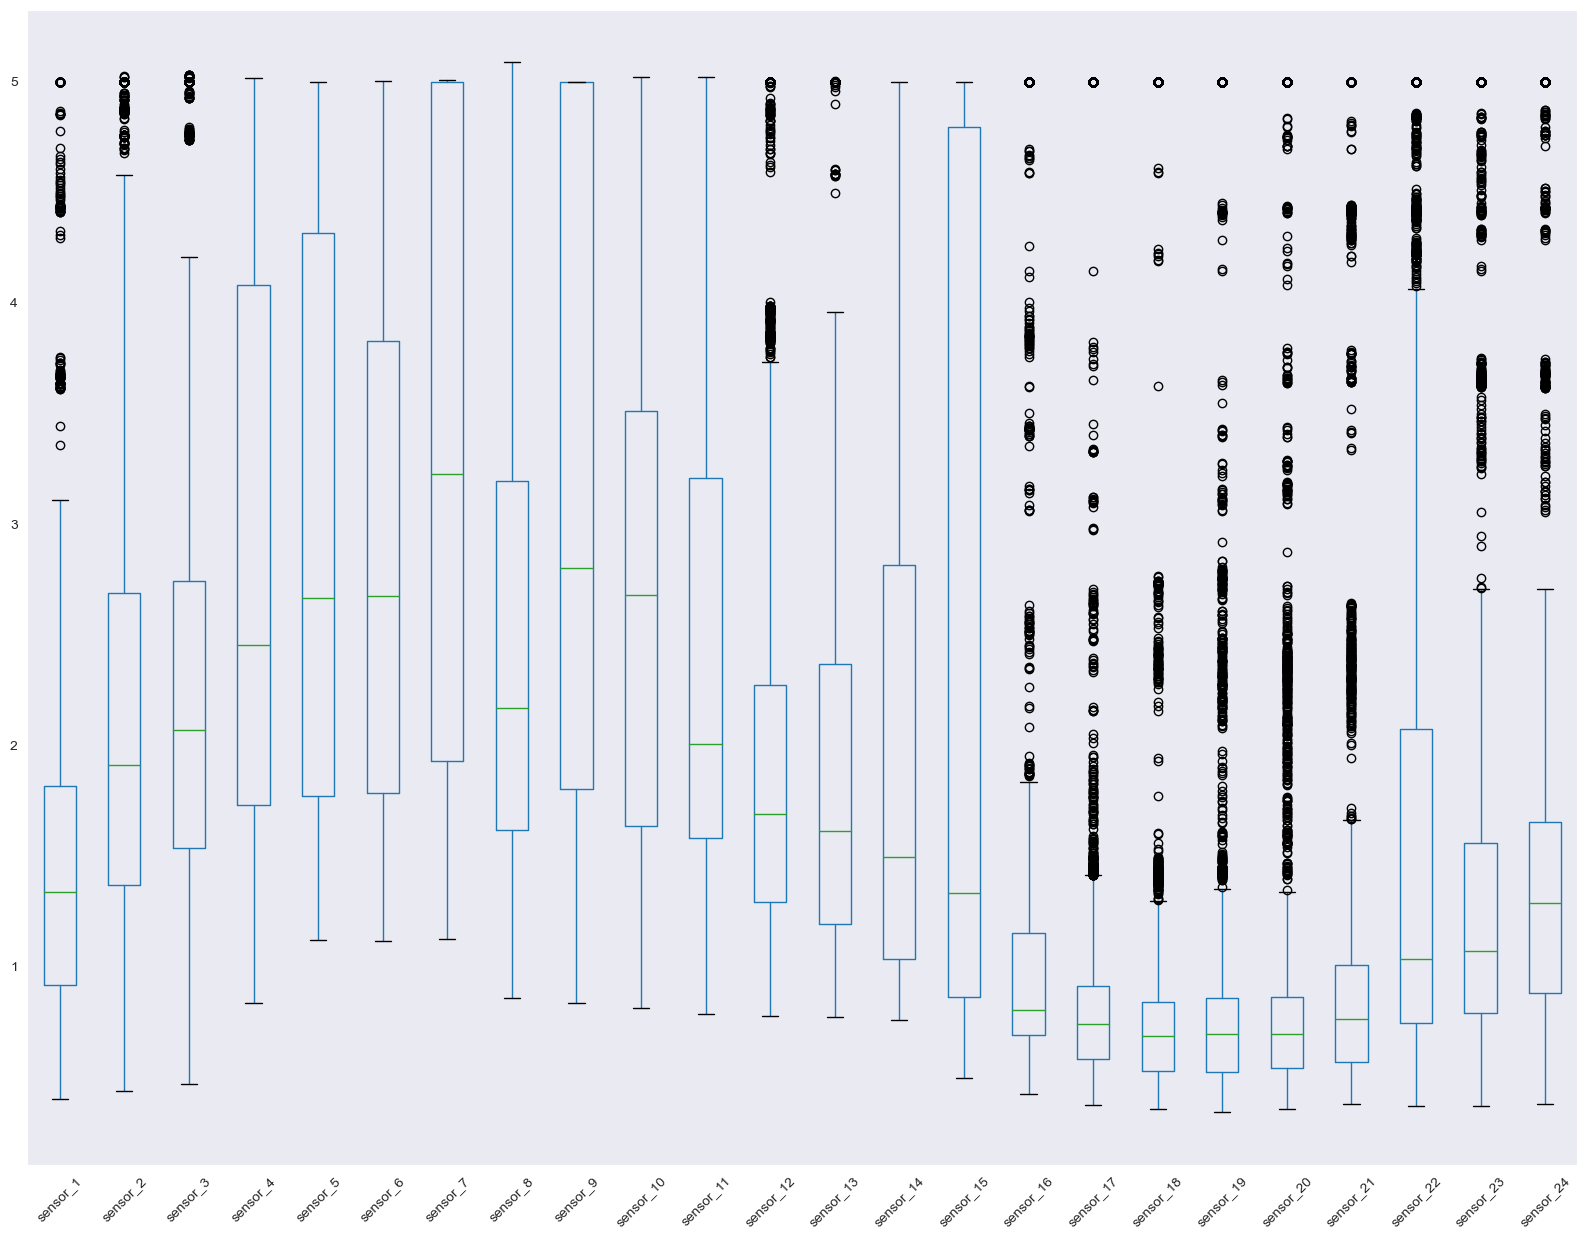

In [10]:
sns.set_style("darkgrid", {"grid.color": "0.5", "grid.linestyle": ":"})


sensorDF[:-1].boxplot(figsize=(20,15), grid=False)
plt.xticks(
    rotation=45)

plt.show()

In [11]:
df = sensorDF

# Baseline para comparação de futuros modelos, utilizando sklearn DummyClassifier

##### Todas as seeds randômicas do notebooks serão 10 (vide célula 1)

In [12]:
np.random.seed(SEED)

X = df.drop(columns=['funcao_robo'])
y = df['funcao_robo']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
dummy = DummyClassifier(strategy= 'most_frequent')
dummy.fit(X_train, y_train)
preds = dummy.predict(X_test)
acc_base = accuracy_score(y_test,preds)
print(f'Acurácia DUMMY BASELINE: {acc_base*100:.3f} %')

Acurácia DUMMY BASELINE: 39.640 %


## Modelo de classificação com Support Vector Machine

In [13]:
np.random.seed(SEED)

X = df.drop(columns=['funcao_robo'])
y = df['funcao_robo']
sm = RandomOverSampler()
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.3)
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc_svc = accuracy_score(y_test,preds)
print(f'Acurácia do modelo: {acc_svc*100:.2f} %')

Acurácia do modelo: 90.89 %


<AxesSubplot:>

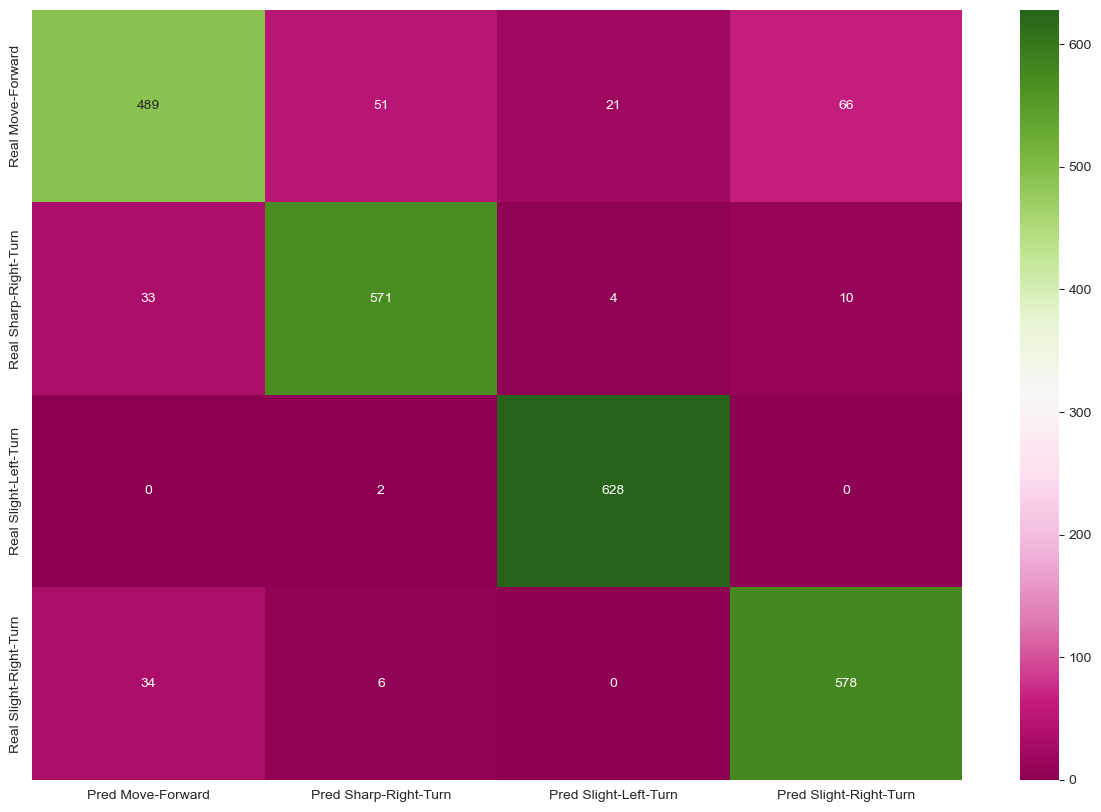

In [14]:
plt.figure(figsize=figsize)
heatMatrix(y_test,preds)

# Modelo de classificação com Decision Tree Classifier, balanceamento de dados e Standard Scaler

In [15]:
np.random.seed(SEED)

X = df.drop(columns=['funcao_robo'])
y = df['funcao_robo']

sm = RandomOverSampler()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_resampled, y_resampled = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25)

dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)
acc_dt = accuracy_score(y_test,preds)
print(f'Acurácia do modelo: {acc_dt*100:.2f} %')

Acurácia do modelo: 93.84 %


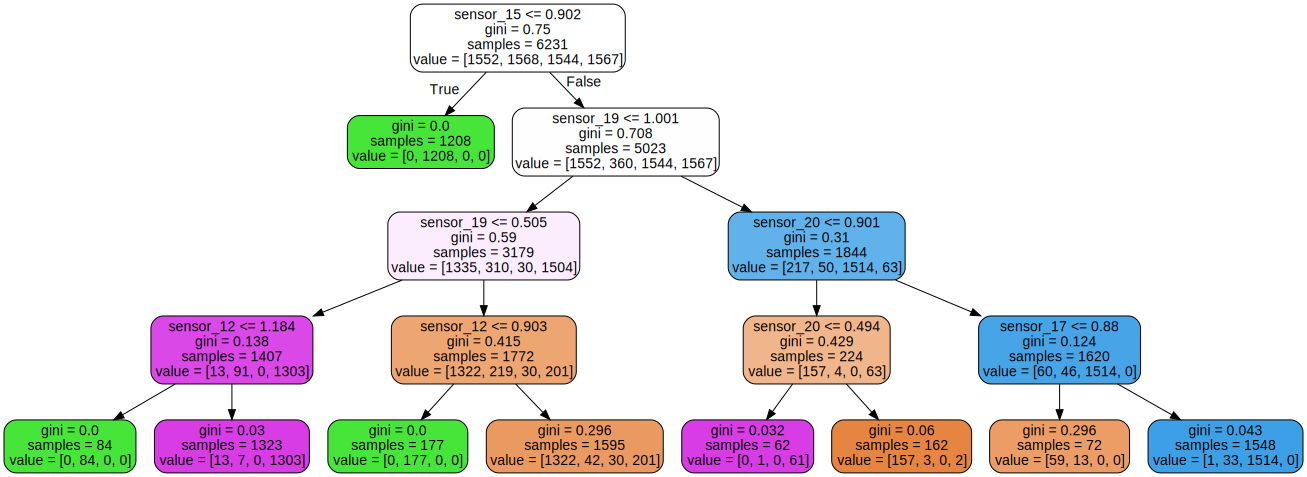

In [16]:
dot_data = export_graphviz(dt,
                           feature_names = X.columns,
                           out_file=None,
                           filled = True,
                           rounded = True
                           )
graph = graphviz.Source(dot_data)
graph

In [17]:
absolutoSVC, relativoSVC = percentuais(acc_svc,acc_base)
absolutoDT, relativoDT = percentuais(acc_dt,acc_base)

print(f'Comparando os dois modelos com a baseline\n')
print(f'Melhoria SVC:\n=>Absoluta = {absolutoSVC:.3f}%\n=>Relativa = {relativoSVC:.3f}%\n')
print(f'Melhoria DT:\n=>Absoluta = {absolutoDT:.3f}%\n=>Relativa = {relativoDT:.3f}%')

Comparando os dois modelos com a baseline

Melhoria SVC:
=>Absoluta = 51.254%
=>Relativa = 129.298%

Melhoria DT:
=>Absoluta = 54.197%
=>Relativa = 136.722%


In [18]:
velocidadeDF.describe()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
count,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000
mean,0.983890,0.617598,-0.243573,9.828651,0.014348,-0.079862,-0.200891,32.829411,9.238009
std,0.125898,1.432777,1.966313,1.705233,3.482269,5.409570,3.581927,0.417761,6.301162
min,0.000000,-8.710806,-13.290681,-3.705523,-35.766602,-69.159159,-23.091944,0.000000,0.005860
25%,1.000000,-0.091680,-1.171232,9.084302,-1.220703,-1.959452,-1.516017,32.501483,4.586517
50%,1.000000,0.518841,-0.208763,9.824110,0.000000,-0.052103,-0.081690,32.789020,6.692151
75%,1.000000,1.325687,0.588506,10.593846,1.266479,1.809469,1.261083,33.172402,15.029036
max,1.000000,13.957495,18.276868,24.024120,44.708252,62.432638,22.165624,33.843322,21.592090


In [19]:
velocidadeDF.corr()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
no_speed_bump,1.000000,0.010817,0.004913,0.001378,-0.003226,-0.004812,0.005988,-0.115996,0.087908
acc_x_dashboard,0.010817,1.000000,0.042717,-0.085498,-0.014035,-0.162388,-0.291334,-0.033647,-0.014085
acc_y_dashboard,0.004913,0.042717,1.000000,0.177825,0.274717,0.227887,-0.003042,-0.020656,0.049443
acc_z_dashboard,0.001378,-0.085498,0.177825,1.000000,0.012794,0.068173,-0.029498,0.010695,0.013094
gyro_x_dashboard,-0.003226,-0.014035,0.274717,0.012794,1.000000,0.176269,-0.006822,0.006191,0.009256
gyro_y_dashboard,-0.004812,-0.162388,0.227887,0.068173,0.176269,1.000000,-0.027163,-0.001022,-0.000130
gyro_z_dashboard,0.005988,-0.291334,-0.003042,-0.029498,-0.006822,-0.027163,1.000000,-0.003665,0.041769
temp_dashboard,-0.115996,-0.033647,-0.020656,0.010695,0.006191,-0.001022,-0.003665,1.000000,-0.214350
speed,0.087908,-0.014085,0.049443,0.013094,0.009256,-0.000130,0.041769,-0.214350,1.000000


In [20]:
speedData = {'Velocidade mediana' : np.median(velocidadeDF['speed']), 'Velocidade média' : np.mean(velocidadeDF['speed']),'Velocidade máxima' : max(velocidadeDF['speed']),'Velocidade mínima' : min(velocidadeDF['speed'])}
tempData = {'Temperatura mediana' : np.median(velocidadeDF['temp_dashboard']),'Temperatura média' : np.mean(velocidadeDF['temp_dashboard']),'Temperatura máxima' : max(velocidadeDF['temp_dashboard']),'Temperatura mínima' : min(velocidadeDF['temp_dashboard'])}

print('DADOS VELOCIDADE')
for i in speedData.keys():
    print(i, f'{speedData[i]:.4f}')

print()

print('DADOS TEMPERATURA')
for i in tempData.keys():
    print(i, f'{tempData[i]:.4f}')

DADOS VELOCIDADE
Velocidade mediana 6.6922
Velocidade média 9.2380
Velocidade máxima 21.5921
Velocidade mínima 0.0059

DADOS TEMPERATURA
Temperatura mediana 32.7890
Temperatura média 32.8294
Temperatura máxima 33.8433
Temperatura mínima 0.0000


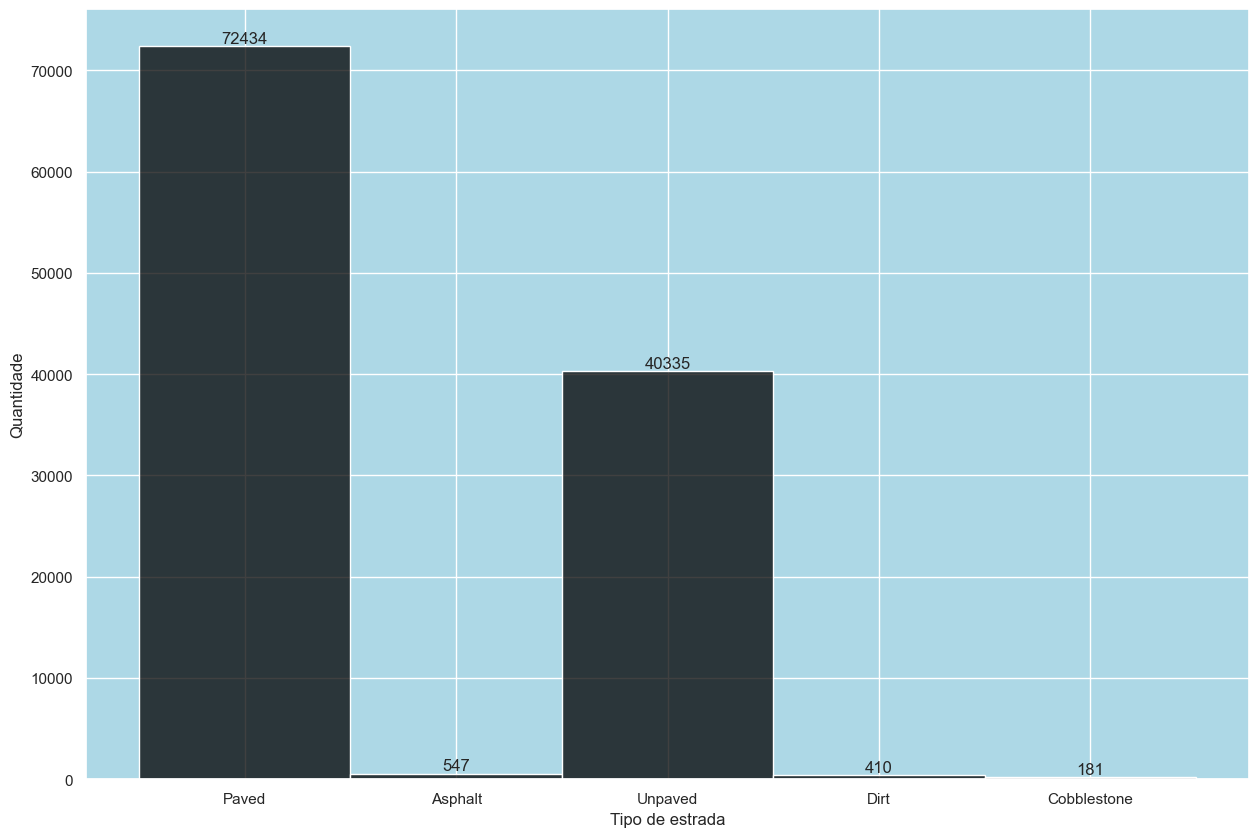

In [21]:
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})


roadTypes = {i : list(velocidadeDF['road']).count(i) for i in velocidadeDF['road'].unique()}
plt.figure(figsize=(15,10))

roadHist = sns.histplot(velocidadeDF['road'],color='black')
for i in roadHist.containers:
    roadHist.bar_label(i)

tp, pos = [i.capitalize() for i in velocidadeDF['road'].unique()], np.arange(5)
plt.xticks(pos,tp)

pl.xlabel('Tipo de estrada')
pl.ylabel('Quantidade')

plt.show()

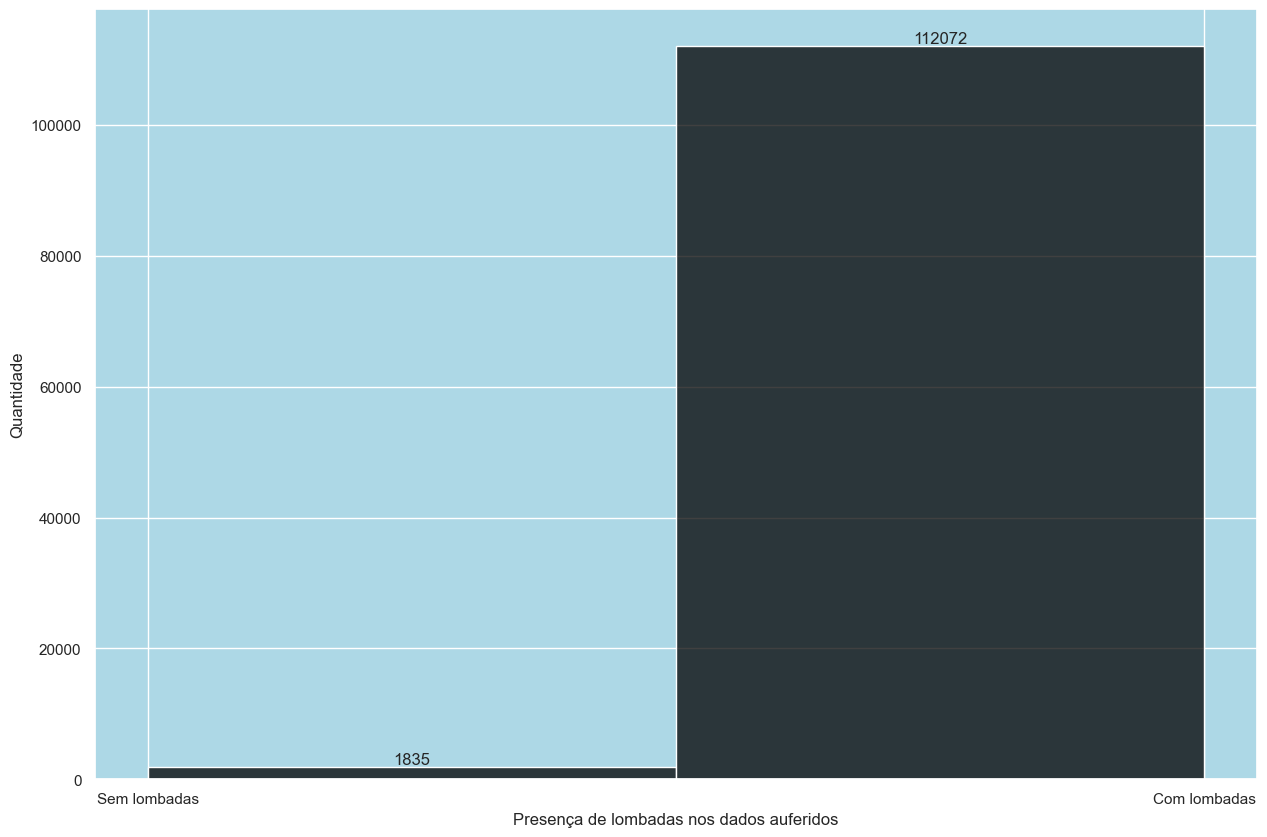

In [22]:
speedBump = {'true' : len([i for i in velocidadeDF['no_speed_bump'] if i == 1]), 'false' : len([i for i in velocidadeDF['no_speed_bump'] if i == 0])}
plt.figure(figsize=(15,10))
histBump = sns.histplot(velocidadeDF['no_speed_bump'],bins=2, color='black')

for i in histBump.containers:
    histBump.bar_label(i)

sb, pos = ['Sem lombadas', 'Com lombadas'], np.arange(2)
plt.xticks(pos,sb)

pl.xlabel('Presença de lombadas nos dados auferidos')
pl.ylabel('Quantidade')
plt.show()

In [23]:
df = velocidadeDF

# Baseline para comparação de futuros modelos

In [24]:
np.random.seed(SEED)

X = velocidadeDF.drop(columns=['road'])
y = velocidadeDF['road']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
preds = dummy.predict(X_test)
acc_base = accuracy_score(y_test,preds)

print(f'Acurácia DUMMY BASELINE: {acc_base*100:.3f} %')

Acurácia DUMMY BASELINE: 63.286 %


# Modelo de classificação com Decision Tree Classifier, balanceamento de dados e StandardScaler

In [25]:
np.random.seed(SEED)

y = df['road']
X = df.drop(columns='road')

sm = RandomOverSampler()
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25)

dt = DecisionTreeClassifier(max_depth = 20)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)
acc_dt = accuracy_score(y_test,preds)

print(f'Acurácia do modelo: {acc_dt*100:.3f} %')

Acurácia do modelo: 89.954 %


<AxesSubplot:>

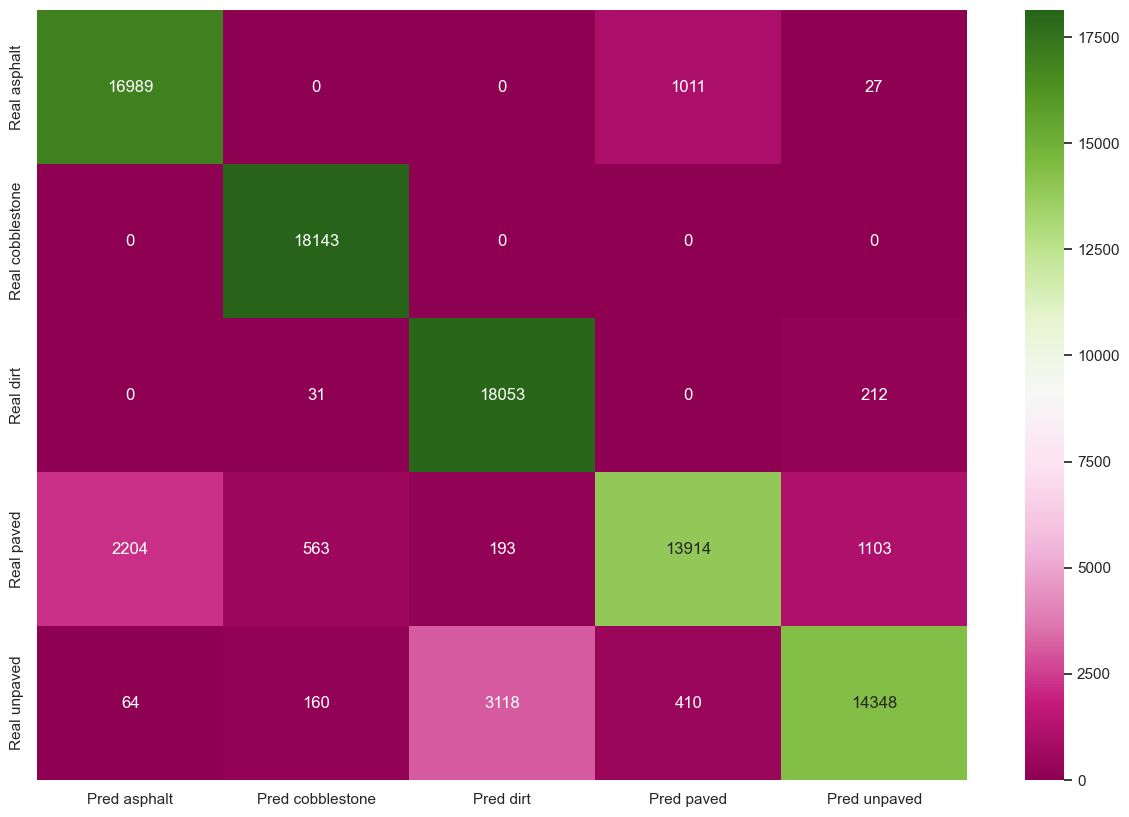

In [26]:
plt.figure(figsize=figsize)
heatMatrix(y_test,preds)

# Modelo de classificação com Linear Support Vector Classification

In [27]:
np.random.seed(SEED)

y = df['road']
X = df.drop(columns='road')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearSVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc_LSVC = accuracy_score(y_test,preds)

print(f'Acurácia do modelo: {acc_LSVC*100:.3f}')

Acurácia do modelo: 79.036
